In [35]:
import sys,os,copy, pickle, glob
import numpy as np
sys.path.append(os.path.abspath('../smodels'))
sys.path.append(os.path.abspath('../protomodels'))
from builder.protomodel import ProtoModel
from tester.predictor import Predictor
from tester.combiner import Combiner
from smodels.experiment.databaseObj import Database
from smodels.tools import runtime
runtime._experimental = True
import matplotlib.pyplot as plt
import seaborn as sns
from names import particleLabels
from sparticleNames import SParticleNames
import pandas as pd
# sns.set() #Set style
# sns.set_style('ticks')
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
# sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("deep"))


In [36]:
#Set colors:
namer = SParticleNames ( susy = False )
#Replace default colors:
colorPalette = 'deep' #Set color palette for particles, if None use default
colorDict = dict(zip(namer.names.keys(),sns.color_palette(palette=colorPalette,n_colors=len(namer.names))))

In [3]:
def getLikelihoods(protomodel,muvals,normalize=True):
    
    #Sort tpList
    critic = sorted(protomodel.tpList, key = lambda tp: tp[0], reverse = True)[0][2]

    #Combiner likelihood:
    combiner = Combiner(0)
    llhComb = np.array([combiner.getCombinedLikelihood(protomodel.bestCombo,mu) for mu in muvals])
    llhCombSM = combiner.getCombinedLikelihood(protomodel.bestCombo,0.)
    llhDict = {'Combined' : llhComb}
    llhDictSM = {'Combined' : llhCombSM}
    for tp in protomodel.bestCombo:
        llhDict[tp.expResult.globalInfo.id] = np.array([tp.getLikelihood(mu) for mu in muvals])
        llhDictSM[tp.expResult.globalInfo.id] = tp.getLikelihood(0.0)

    #Critic likelihood:
    if critic.getLikelihood(1.0) is not None:
        llhDictSM['Critic'] = critic.getLikelihood(0.0)
        llhDict['Critic'] = np.array([critic.getLikelihood(mu) for mu in muvals])
    else:
        llhDict['Critic'] = None
        llhDictSM['Critic'] = None
    llhDict['SM values'] = llhDictSM
    
    #Compute normalizations:
    if normalize:
        for key,llhd in llhDict.items():
            if key != 'SM values':
                norm = llhd.sum()
                llhDict[key] = llhd/norm
                llhDict['SM values'][key] *= 1/norm
    
    
    return llhDict

def getPredictions(protomodel,dbpath):
    
    #Compute predictions:
    pred = Predictor(walkerid=0,dbpath=dbpath)
    res = pred.predict(protomodel)

In [4]:
modelList = []
for f in glob.glob('../toyWalk/protomodel*pcl'):
    with open(f,'rb') as ff:
        protomodel = pickle.load(ff)
        protomodel.templateSLHA = '../protomodels/builder/templates/template1g.slha'
        kold = protomodel.K
        getPredictions(protomodel,os.path.join(os.path.dirname(f),'toy-database'))
        protomodel.step -= 1 #Set starting of step counter at zero instead of 1
        knew = protomodel.K
        if kold != knew and abs(kold-knew) > 0.1:
            print(protomodel,protomodel.step,'kold=',kold,'knew=',knew)
            break
        modelList.append(protomodel)
modelList = sorted(modelList, key = lambda p: p.step)        

[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(6953.24) and eUL(2952.36) is too large (dr=-0.40)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 12 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(9299.03) and eUL(3919.22) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(9299.03) and eUL(3919.22) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(9299.03) and eUL(3919.22) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)
WARNING in statistics.likelihoodFromLimits() in 41: asking for likelihood from limit but difference between oUL(7428.45) and eUL(3099.47) is too large (dr=-0.41)


[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 1 -> 1 combinations.


In [13]:
#Get all particles which appears in all steps:
particles = []
for p in modelList:
    particles += p.unFrozenParticles()
particles = list(set(particles))

In [14]:
#Build useful dataset:
steps = np.array([p.step for p in modelList])
nparticles = np.array([len(p.unFrozenParticles()) for p in modelList])
Kvalues = np.array([p.K if (p.K and p.K > 0) else 0.0 for p in modelList])
Zvalues = np.array([p.Z if (p.Z and p.Z > 0) else 0.0 for p in modelList])
masses = dict([[pid,[]] for pid in particles])
for p in modelList:
    for pid in masses:
        if pid in p.masses:
            masses[pid].append(p.masses[pid])
        else:
#             masses[pid].append(np.nan)
            masses[pid].append(-100.0)
for pid in masses:
    masses[pid] = np.array(masses[pid])
dataDict = {'step' : steps, 'K' : Kvalues, 'Z' : Zvalues, 
                   'nparticles' : nparticles}
dataDict.update(masses) 
df = pd.DataFrame(dataDict)

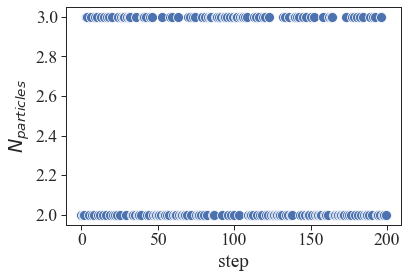

In [15]:
sns.scatterplot(x='step',y='nparticles',data=df, s=100)
plt.ylabel(r'$N_{particles}$')
plt.xlabel('step')
plt.show()

In [16]:
print('Max K = %1.2f at step %i' %(Kvalues[np.argmax(Kvalues)],np.argmax(Kvalues)))
print(modelList[np.argmax(Kvalues)])

Max K = 4.05 at step 160
ProtoModel (XZ1,Xt): K = 4.05, Z = 2.51


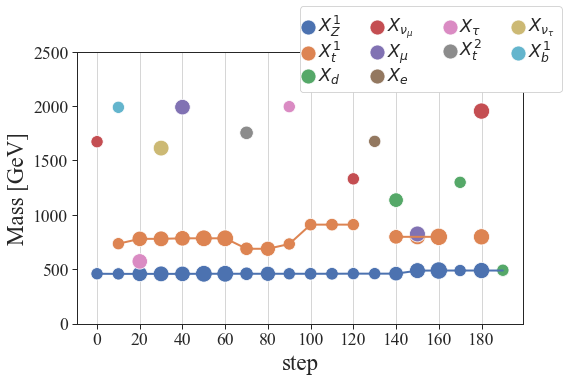

In [34]:
fig = plt.figure(figsize=(8, 5))
nsteps = 10

pids = sorted(masses.keys(), key = lambda pid: np.sum(np.where(masses[pid][::nsteps] <= 0)))
for pid in pids:
    if max(masses[pid][::nsteps]) <= 0.0: continue
    sns.scatterplot(x='step',y=pid,data=df[::nsteps], size='K', sizes = (150,300),
                    label=r'$%s$' %(particleLabels[pid]), legend=False)
    m = np.where(masses[pid] > 0, masses[pid],np.nan) #Fix for avoid plotting to negative values
    plt.plot(df['step'][::nsteps],m[::nsteps],'-',linewidth=2)

plt.ylim(0.,2500.0)
plt.xlabel('step', fontsize=23)
plt.ylabel('Mass [GeV]', fontsize=23)
plt.xticks(df['step'][::2*nsteps])
# plt.xlim(-5,198)
plt.grid(axis='x') 
plt.legend(loc=(0.5,0.85),framealpha=1.0,ncol=4,labelspacing=0.05,handlelength=0.1,handletextpad=0.5)
# plt.tight_layout()
plt.savefig('toyWalk_masses.pdf')
plt.show()

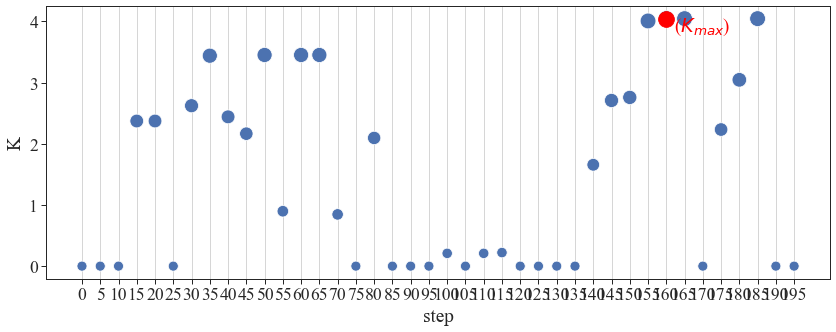

In [18]:
fig = plt.figure(figsize=(12, 5))
nsteps = 5
sns.scatterplot(x='step',y='K',data=df[::nsteps],size='K',legend=False,sizes=(100,250))
plt.scatter([steps[np.argmax(Kvalues)]],[Kvalues.max()],marker='o',s=250,c='red')
plt.text(x=steps[np.argmax(Kvalues)]+2,y=0.95*Kvalues.max(),s=r'($K_{max}$)',c='red')
plt.xlabel('step')
plt.ylabel('K')
plt.xticks(df['step'][::nsteps])
# plt.xlim(170,200)
plt.grid(axis='x') 
plt.tight_layout()
plt.savefig('toyWalk_Kvalues.pdf')
plt.show()

In [41]:
for p in modelList[0:20]:
    if not p.K: continue
#     if len(p.unFrozenParticles()) != 2: continue
    print(p,p.step)

ProtoModel (XZ1,Xnumu,Xt): K = -2.68, Z = 0.76 6
ProtoModel (XZ1,Xt): K = -1.68, Z = 0.76 7
ProtoModel (XZ1,Xt,Xb): K = -2.95, Z = 0.76 10
ProtoModel (XZ1,Xt): K = 3.62, Z = 2.42 11
ProtoModel (XZ1,Xt): K = 3.62, Z = 2.42 12
ProtoModel (XZ1,Xt,Xmu): K = 2.37, Z = 2.42 13
ProtoModel (XZ1,Xt): K = 3.62, Z = 2.42 14
ProtoModel (XZ1,Xt,Xtau): K = 2.37, Z = 2.42 15
ProtoModel (XZ1,Xt): K = -1.61, Z = 0.80 16
ProtoModel (XZ1,Xt,Xnutau): K = 2.62, Z = 2.42 17
ProtoModel (XZ1,Xt,Xg): K = -4.46, Z = 0.74 18
ProtoModel (XZ1,Xt): K = 3.62, Z = 2.42 19


In [38]:
printSteps = [144,160,164]
muvals = np.linspace(-10,10,500)
llhDictList = []
for stp in printSteps:
    protomodel = [p for p in modelList if p.step == stp][0]
    print(protomodel)
    llhDict = getLikelihoods(protomodel,muvals)
    llhDictList.append(llhDict)

ProtoModel (XZ1,Xt): K = 1.72, Z = 1.99
ProtoModel (XZ1,Xt): K = 4.05, Z = 2.51
ProtoModel (XZ1,Xt,Xtau): K = 2.80, Z = 2.51


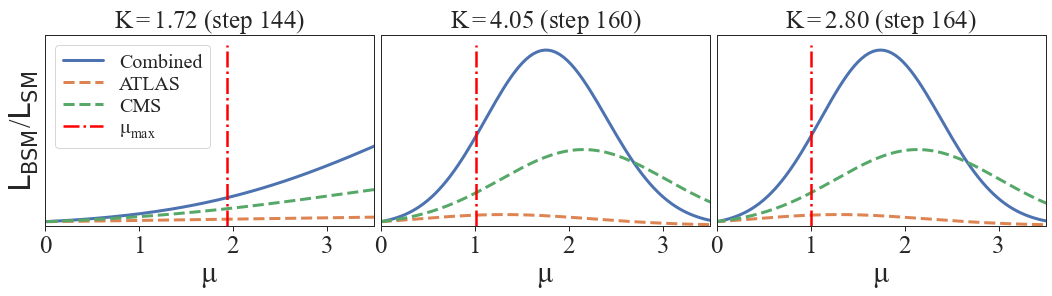

In [39]:
f, axarr = plt.subplots(int(len(printSteps)/3), 3,figsize=(15, 4.5),sharey=True)
irow, icolumn = 0,0
for i,stp in enumerate(printSteps):
    ax = axarr[icolumn]
    protomodel = [p for p in modelList if p.step == stp][0]
    llhDict = llhDictList[i]
    for key,val in llhDict.items():
        if key == 'SM values': continue
        if key == 'Critic': continue
        if key == 'Combined': ls = '-'
        else: ls = '--'
        ax.plot(muvals,val/llhDict['SM values'][key],label=key.split('-')[0],linestyle=ls,linewidth=3)
    
    ax.axvline(x=protomodel.mumax,ymax=0.95,c='red',linestyle='-.',label=r'$\mathdefault{\mu_{max}}$',
                   linewidth=2.5)
    tit = r'$'
    tit += '\mathdefault{K = %1.2f}$ (step %i)' %(protomodel.K,protomodel.step)
    ax.set_title(tit,fontsize=25)
    ax.set_xticks(np.linspace(0,5,6))
    icolumn += 1
    ax.set_xlabel(r'$\mathdefault{\mu}$',fontsize=30)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    if icolumn == 1:
        ax.set_ylabel(r'$\mathdefault{\mathrm{L}_{\mathrm{BSM}}/\mathrm{L}_{\mathrm{SM}}}$',fontsize=30)
        ax.legend(loc='upper left',framealpha=1,fontsize=20,labelspacing=0.2)
    else:
        ax.set_yticks([])
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,50)
plt.tight_layout()
plt.subplots_adjust(wspace = 0.02)
plt.savefig('toyWalk_likelihoods.pdf')
plt.show()

In [28]:
protomodel = [p for p in modelList if p.step == 144][0]
print(protomodel)
print(protomodel.masses)

ProtoModel (XZ1,Xt): K = 1.72, Z = 1.99
{1000022: 575.4522830092981, 1000006: 797.1894410729994}


In [29]:
protomodel = [p for p in modelList if p.step == 160][0]
print(protomodel)
print(protomodel.masses)

ProtoModel (XZ1,Xt): K = 4.05, Z = 2.51
{1000022: 487.2210492446602, 1000006: 797.1894410729994}


In [37]:
protomodel = [p for p in modelList if p.step == 164][0]
print(protomodel)
print(protomodel.masses)

ProtoModel (XZ1,Xt,Xtau): K = 2.80, Z = 2.51
{1000022: 487.2210492446602, 1000006: 797.1894410729994, 1000015: 867.3573721573694}


In [31]:
protomodel = [p for p in modelList if p.step == 160][0]
print(protomodel)
# print(protomodel.masses)
for tp in protomodel.tpList: print(tp[0],tp[2].expResult)

ProtoModel (XZ1,Xt): K = 4.05, Z = 2.51
0.33794630981505386 ATLAS-SUSY-2016-16: bWN,bffN,tN_diag_high,tN_diag_low,tN_diag_med,tN_high,tN_med(7):T2ttoff,T2bbffff,T2tt(3)
0.27733324341739524 CMS-SUS-16-050:(0):T1tttt,T1ttttoff,T2tt,T2ttoff,T5tctc,T5tttt(6)
1.2883494307249348 CMS-SUS-19-006:(0):T1,T1bbbb,T1tttt,T1ttttoff,T2,T2bb,T2tt,T2ttoff(8)
